# Сборный проект - 1



# Оглавление

[Этап 1. Описание проекта](#1)

[Этап 2. Полученние данных](#2)

[Этап 3. Предобработка данных](#3)

[Этап 4. Исследовательский анализ данных](#4)

[Этап 5. Составление портрета игроков каждого региона](#5)

[Этап 6. Исследование статистических показателей](#6)

[Этап 7. Проверка гипотез](#7)

[Этап 8. Общие выводы](#8)

<a name="1"></a>
# Этап 1. Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки игроков и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

## Описание данных games.csv
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (от 0 до 100)
* User_Score — оценка пользователей (от 0 до 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

<a name="2"></a>
# Этап 2. Получение данных

Получим и изучим данные, предоставленные для проекта.

## 2.1 Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from scipy import stats as st  

%matplotlib inline  

## 2.2 Загрузка данных

Загрузим файл `games.csv` и сохраним его в переменной `df`, а также посмотрим структуру таблицы.

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')  # чтение базы данных

df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## 2.3 Общая информация о данных таблицы df.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Рассмотрим подробно полученную информацию.

Всего в таблице 11 столбцов, тип данных у столбцов object и float64.

Подробно разберём, какую информацию содержать столбцы базы данных df:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (от 0 до 100)
* User_Score — оценка пользователей (от 0 до 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Количество значений в столбцах различаются, что указывает на наличие пропущенных значений в данных.

## **Выводы**

Каждая строка таблицы содержит данные о названии игры, когда игра выпущена, на какой платформе, продажи в разных регионах и различные оценки.

Типы данных соответствуют столбцам, кроме User_Score, тип столбца небоходимо перевести в вещественные числа.

В данных имеются пропуски, возможные причины:
* Даты выпуска игр начинаются с 1980 года, для части старых игр установка точной даты выпуска может быть затруднительной;
* Оценивание игр могло не проводится.

Для подготовки данных к анализу следует решить следующие задачи:
* Заменить названия столбцов (привести к нижнему регистру);
* Преобразавать данные в нужные типы:
  * оценки игроков преобразовать в вещественный тип и обработать исключения;
* Обработать пропуски:
  * Имеются 2 пропуска в `именах` и `жанрах`;
  * Пропуски для `годов` и `оценок` следует оставить и исключать в исследованиих, где недопустимы пропуски;
* Посчитать суммарные продажи во всех регионах и записать результаты в отдельный столбец, для использования в аналитических расчётах.

<a name="3"></a>
# Этап 3. Предобработка данных

## 3.1 Исправление названий столбцов

Проверим название столбцов на "невидимые" символы.

In [4]:
print(df.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


В названиях отсутствуют лишние "невидимые" символы.

Для удобства использования:
* переведём названия столбцов в нижний регистр;
* дадим более понятные названия столбцов:
  * `game_name` для `name`;
  * `platform_name` для `platform`;
  * `genre_name` для `genre`;
  * `gamer_score` для `user_score`;
  * `esrb_rating` для `rating`.


Используем переименование методом `rename`, чтобы при смене структуры таблицы и порядка столбцов не возникало ошибок.

In [5]:
update_columns_names = ['game_name',
                        'platform_name',
                        'year_of_release',
                        'genre_name',
                        'na_sales',
                        'eu_sales',
                        'jp_sales',
                        'other_sales',
                        'critic_score',
                        'gamer_score',
                        'esrb_rating']

keys = df.columns
values = update_columns_names
rename_dictionary = dict(zip(keys, values))

df.rename(rename_dictionary, axis='columns', inplace=True)
print('Новые названия столбцов:', *df.columns, sep='\n')

Новые названия столбцов:
game_name
platform_name
year_of_release
genre_name
na_sales
eu_sales
jp_sales
other_sales
critic_score
gamer_score
esrb_rating


## 3.2 Исправление типа данных

Перед обработкой данных необходимо сменить тип данных:
* тип данных `gamer_score` необходимо сменить с типа данных `object` на вещественный тип данных `float`.

In [6]:
# <замена методом to_numeric типа данных столбца 'gamer_score' c object на float>
# используется параметр errors='coerce' для замены нечисловых значений на NaN
df['gamer_score'] = pd.to_numeric(df['gamer_score'], errors='coerce')

In [7]:
# <проверка изменения типа столбца 'gamer_score' c object на float>
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16713 non-null  object 
 1   platform_name    16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre_name       16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   gamer_score      7590 non-null   float64
 10  esrb_rating      9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Теперь типы данных соответствуют данным в столбцах.

## 3.3 Обработка пропусков

Посчитаем количество пропусков

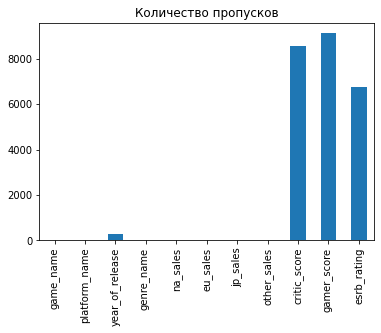

In [8]:
# <суммарное количество пропусков, выявленных методом isnull() в таблице df>
df.isnull().sum().plot(kind='bar', title='Количество пропусков')

Пустые значения свидетельствуют, что для некоторых игр доступна не вся информация.

Причины могут быть разными:
* общая причина, что данные были загружены не полностью;
* год выпуска игры мог быть пропущен или имеются сложности в опредленнии даты выпуска старых игр;
* для разных игр проводится разное оценивание, пропуски могут свидетельствовать, что данное оценивание вообще не проводилось для игры;
* имеются 2 пропуска в имени и жанре игр, данный случай можно рассмотреть вручную.

Причины всех пропусков необходимо разобрать, выявить и устранить причины пропусков.

Изучаем случаи с 2 пропусками в названии и жанрах.

In [9]:
# выводим на экран пропуски в имени
df[df['game_name'].isnull()].head()

,game_name,platform_name,year_of_release,genre_name,na_sales,eu_sales,jp_sales,other_sales,critic_score,gamer_score,esrb_rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Величина продаж незначительная, поэтому данные следует удалить из-за пропуска жанра, создавать незнакомый жанр с незанкомыми играми из-за 2 записей нецелесообразно.

In [10]:
# <удаление взаимосвязанных пропущенных значений в столбце 'genre_name' и 'game_name'>
df.dropna(subset=['genre_name'], inplace=True)

Изучим варианты значения столбца 'esrb_rating'

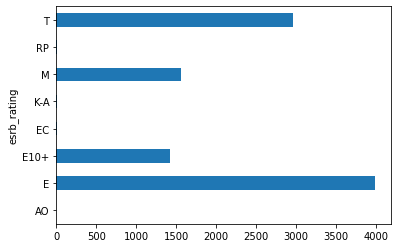

In [11]:
# <вывод методом groupby на экран варианты значений столбца 'esbr_rating'>
df.groupby('esrb_rating')['esrb_rating'].count().plot(kind='barh')

Значения столбца `'esbr_rating'` может принимать 8 различных строковых значений.

Пропусков в столбце `'esbr_rating'` имеется около 6,5 тысяч, что является статистически значимым и удаление пропусков заметно повлияет на результаты анализа, поэтому строки с пропусками следует оставить.

Пропуски рейтингов удобно обобщить в отдельную категорию "неизвестные" и присвоить значение `'unknown'`

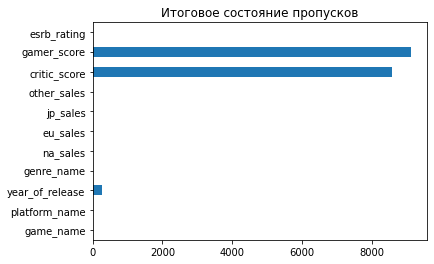

In [12]:
# <замена пропусков в стобце 'esbr_rating' методом замены fillna()>
df['esrb_rating'] = df['esrb_rating'].fillna('unknown')

# <проверка результатов замены пропусков>
df.isna().sum().plot(kind='barh', title='Итоговое состояние пропусков')

Пропуски в оценках и годах составляет значительное количество, поэтому их следует обрабатывать непосредственно перед исследованиями, где это необходимо, для остальных исследований, пригодится более широкий набор данных.

## 3.4 Обработка дубликатов

Далее следует проверить данные на наличие дубликатов.

In [13]:
# <получение суммарного количества дубликатов в таблице df методом duplicated()>
print('Количество дубликатов:', df.duplicated().sum())

Количество дубликатов: 0


Дубликатов не обнаружено, однако возможно наличие дублирующих записей без полного сходства.

Например, названия одного и того же жанра может различаться формулировками.

Изучим список уникальных называний жанров.

In [14]:
# <сохраниние в переменной genres_list списка уникальных значений
# выявленных методом unique()>
genres_list = df['genre_name'].unique()

print('Название жанров:', *genres_list, sep='\n')

Название жанров:
Sports
Platform
Racing
Role-Playing
Puzzle
Misc
Shooter
Simulation
Action
Fighting
Adventure
Strategy


Список жанров не содержит дублирующих названий одного и того же жанра в разных формулировках.

Следует проверить возможность дублирующих названий игр, в зависимости от регистра.

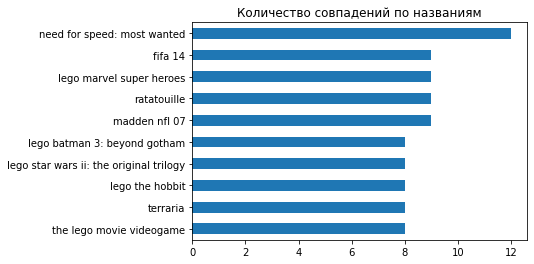

In [15]:
# <вывод на экран 5 групп повторяющихся названий игр в едином нижнем регистре>
# str.lower() приводит все символы строк в нижний регистр
# value_counts() подсчитывает количество повторяющихся значений
(
    df['game_name']
    .str.lower()
    .value_counts()
    .head(10)
    .sort_values(ascending=True)
    .plot(kind='barh', title='Количество совпадений по названиям')
)

Проверим на наличие дубликатов название Need for Speed: Most Wanted, которое встречается 12 раз.

In [16]:
# <вывод на данных по запросу 'need for speed: most wanted'>
# str.lower() приводит все символы строк в нижний регистр
df[df['game_name'].str.lower() == 'need for speed: most wanted']

,game_name,platform_name,year_of_release,genre_name,na_sales,eu_sales,jp_sales,other_sales,critic_score,gamer_score,esrb_rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,unknown
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,unknown
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,unknown
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Дубликатов не обнаружено, игры с одинаковым названием различаются платформами, годами, продажами и оценками.

## 3.5 Обобщение данных

Для удобства дальнейшей аналитики в данные слудует добавить столбец сумарных продаж всех регионов с названием `total_sales`. 

Для удобства восприятия данных сполбец следyет разместить после всех видов продаж.

In [17]:
# <добавление в столбец 'total_sales' с значениями сумарных продаж >
# для наглядности данных используется метод insert(), 
# чтобы вставить столбец после столбцов продаж 
if 'total_sales' not in df.columns:
    df.insert(loc=8,  # позция вставки
              column='total_sales',  # название новой колонки
              value=df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
              .sum(axis=1)  # сумма строк столбов с данными продаж
              )    

# <вывод на экран первые 5 строк результатов добавления столбца total_seles>
df.head()

,game_name,platform_name,year_of_release,genre_name,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,gamer_score,esrb_rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,unknown


Далее получаем общую информацию о данных, чтобы убедиться, что предварительная обработка данных выполнена успешно.

In [18]:
# получение общей информации о базе данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16713 non-null  object 
 1   platform_name    16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre_name       16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   total_sales      16713 non-null  float64
 9   critic_score     8137 non-null   float64
 10  gamer_score      7590 non-null   float64
 11  esrb_rating      16713 non-null  object 
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


## **Выводы**

На этапе предварительной обработки данных обнаружились следующие проблемы:
* Не все названия столбцов имели понятные и однозначные обозначения, часть значений были переименованы и приведены к единому низкому регистру;
* Данные столбца `'gamer_score'` имели формат строковых данных, данный столбец предназначен для числовых данных, тип данных удалось успешно изменить;
* Для обработки пропущенных данных в столбцах `game_name`, `genre_name` `year_of_release`, были пременены разные подходы:
  * пропуски в годах и оценках составляют половину всего набора данных, поэтому пропуски следует обработать непосредственно для исследований где пропуски недопустимы, для всех остальных исследований лучше использовать весь набор данных.
  * Пропуски в рейтинге `esrb_rating` тоже носили значимый характер, поэтому для сохранения была введена новая категория рейтингов "неизвестстно" (`unknow`).

<a name="4"></a>
# Этап 4. Исследовательский анализ данных

## 4.1 Анализ значимости выпуска игры в разные годы

Узнаем сколько игр выпускалось в разные годы. И данные за какие годы наиболее важны.

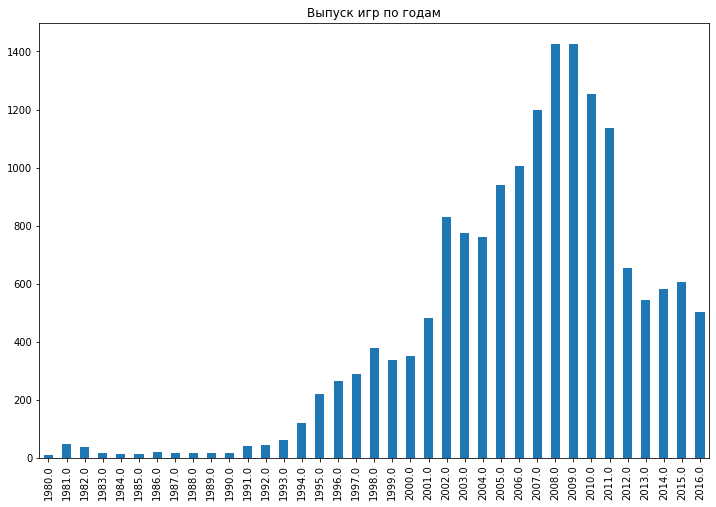

In [19]:
(
    df['year_of_release']
    .value_counts()
    .sort_index()
    .plot(kind='bar', figsize=(12, 8), title='Выпуск игр по годам')
)   

После 2008 года заметно сокращение количества выпускаемых игр, следует выяснить причину, возможные предположения:
* выпуск игр переходит на другие платформы, которые отсутствуют в данных;
* увеличиваются общие сборы на игру.

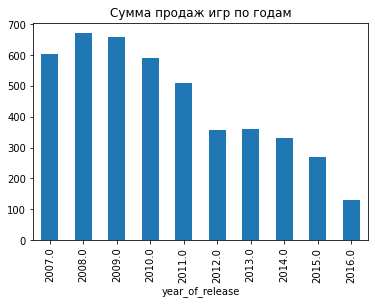

In [20]:
(
    df
    .query('year_of_release >= 2007')  # запрос данных с 2007 года
    .groupby('year_of_release')['total_sales']  # сортировка данных
    .sum()  # суммирование продаж
    .plot(kind='bar', title='Сумма продаж игр по годам')
)

С падением количества игр, сокращается объём сборов, что может означать перетекание платёжеспособного спроса на другие платформы.

**Выводы**

* Выпуск игр рос 1980 до 2008 года, потом выпуск игр стал сокращаться.

* Количество игр быстро увеличивалось с 9 до 1427 к 2008 году, потом выпуск игр плавно снижался до 502.

* До 1994 количество игры измерялось десятками, потом сотнями до 2006, потом тысячами, а с 2012 вновь сотнями.

* После 2008 года, происходило и падение выпуска игр и падение продаж, однако согласно данным [Newzoo](https://venturebeat.com/2018/04/30/newzoo-global-games-expected-to-hit-180-1-billion-in-revenues-2021/) игровой рынок постоянно растёт, а значит продажи перетягивает более популярная мобильная платформа;

* **Сопостовимые удобные для анализа данные находятся с 2000 по 2016 года.**

## 4.2 Изменения продаж по платформам

### 4.2.1 Изменения продаж по платформам по годам

Для получению общей картины построим график изменения продаж у платформ по годам.

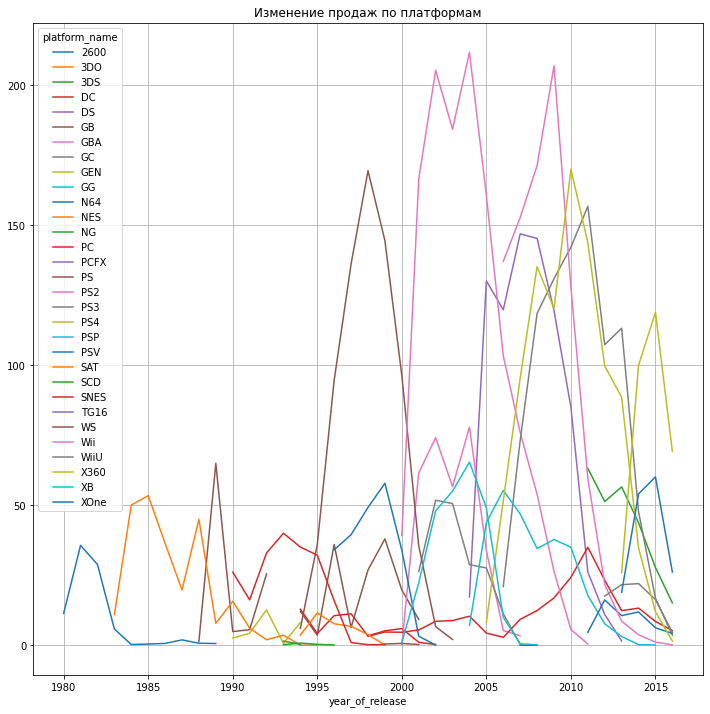

In [21]:
# вывод графика изменения продаж по платформам
(
    df  # база данных
    .pivot_table(index='year_of_release',  # года размещаются по горизонтальной оси
                 columns='platform_name',  # по именам платформ будут строятся линии
                 values='total_sales',  # значения продаж по вертикальной оси
                 aggfunc='sum')  # значения по продажам платформ суммируются
    .plot(title='Изменение продаж по платформам',
          figsize=(12, 12), grid=True)  # отображаение графика с сеткой и заданым размером
)  

**Выводы**

Большинство платформ быстро набирают продажи, потом опускаются к нулевым продажам и прекращают своё существование.

По графикам видно:
* есть платформы с коротким сроком жизни около 5 лет;
* есть множество платформ со сроком жизни около 10 лет;
* есть долгоживущие платформы более 10 лет, например, персональный компьютер.

### 4.2.2 Платформы с наибольшими суммарными продажами

Узнаем распределение продаж по площадкам.

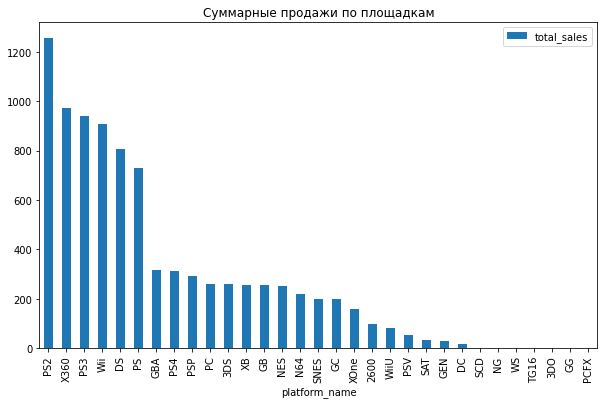

In [22]:
# вывод суммы продаж по площадкам в порядке убывания
(
    df  # база данных
    # групировка по имени платформ и выбор столбцов с платформами и продажами
    .groupby('platform_name')[['platform_name', 'total_sales']]  
    .sum()  # суммирование продаж
    .sort_values('total_sales', ascending=False)  # сортировка по убыванию
    .plot(kind='bar', figsize=(10, 6), title='Суммарные продажи по площадкам')
)

**Вывод**

Различия платформ по суммарным продажам:
* Безусловный лидер с заметным отрывом по продажам является платформа `PS2`;
* 5 площадок `X360`, `PS3`, `Wii`, `DS`, `PS` имеют существенный отрыв от остальных площадок;
* Продажи по остальным площадкам плавно снижаются.

### 4.2.3 Время жизни платформ

Данные для анализа можно взять на основе среднего времени жизни платформы.

Получим время жизни всех плаформ.

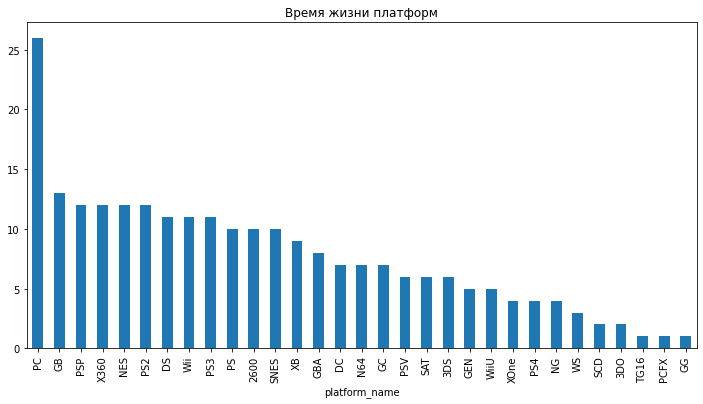

In [23]:
# определение жизни платформ в порядке убывания
platform_livetime = (
    df  # база даных
    # групировка по платформам и годам выпуска с выделеним данных о продажах
    .groupby(['platform_name', 'year_of_release'])['total_sales']
    .sum()   # суммирование продаж для уплотнения данных по годам
    .unstack(-1)  # выделение для годов выпуска отдельных столбцов
    .notna()  # выделение годов в которых были продажи
    .sum(axis=1)  # сумирование по строкам платформ годов где были прожади
    .sort_values(ascending=False)  # сортировка по убыванию
)

platform_livetime.plot(kind='bar', figsize=(12, 6), title='Время жизни платформ')

Персональные компьютеры живее всех живых и пока не собираются уходить на покой, а вот популярные платформы живут около 10 лет.

Узнаем время среденее время жизни платформ, исключая ныне действующие платформы.

In [24]:
# определение среднего времени жизни платформ 
platform_alive_names = (
        df
        .query('year_of_release == 2016 and total_sales > 0') # отбор активных платформ
        .groupby('platform_name')
        .count()
        .index  # получение имён
)

# получение среднего, кроме живых платформ через метод isin
platform_livetime_mean = (
        platform_livetime
        .loc[~platform_livetime.index.isin(platform_alive_names)]
        .mean()        
)

print('Среднее время жизни платформ:', 
      '{:.2f}'.format(platform_livetime_mean))

Среднее время жизни платформ: 6.95


**Выводы**

Среднее время жизни платформ составляет 6.95 лет. 

В целом имеются неудачные платформы со сроком жизни 1-3 года, а вот популярные платформы живут дольше среднего - около 10 лет.

## 4.3 Выбор периода анализа для данных

Изучим подрбно как распределены значения по годам, чтобы гистраграмма была более детальной выберем количество стобцов гистограмы, равное 36 - количеству годов наблюдения с 1980 по 2016.


Text(0.5, 1.0, 'Распеределение выпуска игр по годам')

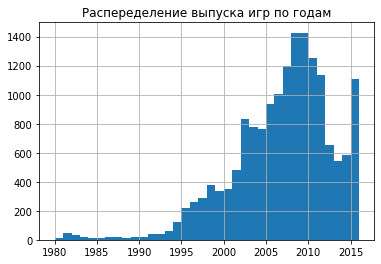

In [25]:
# распределение по годам для всех значений
(
    df['year_of_release']
    .hist(bins=36)
    .set_title('Распеределение выпуска игр по годам')
)    

Ранее уже рассматривались данные продаж по годам, на которых не было всплеска в 2016 году. 

На гистограммах возможны вслески данных в зависимости от масштаба, поэтому следует внимательно следить за масштабом гистограмм.

Для выбора периода данных для анализа следует учитывать следующие факторы:
* среднее время жизни платформы с составляет 7 лет;
* для прогноза будущего наиболее актуальны данные за последние годы;
* наличие разных стадий развития рынка (рост до 2008, пик 2008-2009 и спад 2010-2016).

В результате следует брать данные за за 2010-2016 годы, которые наиболее актуальны, относятся к последней тенденции и укладываются в средний срок жизни платформы.

Text(0.5, 1.0, 'Распределение выпуска игр по годам для анализа')

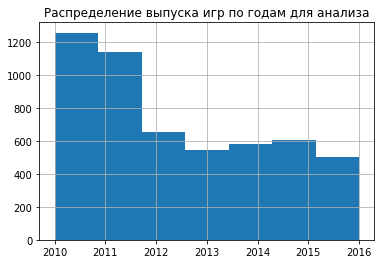

In [26]:
(
    df
    .query('year_of_release >= 2010')['year_of_release']
    .hist(bins=7)
    .set_title('Распределение выпуска игр по годам для анализа')
)    

При выборе правильного масштаба всплеск в 2016 году на графике исчез

## 4.4 Определение рабочего набора данных

Создадим рабочий набор данных с названием `work_data` за выбранные c 2010 по 2016 года и выведем структуру данных.

In [27]:
# определение диапазона рабочих данных
work_data_start_year = 2010
work_data_end_year = 2016

# определение названия рабочих данных 
work_data = (
    df
    .query('@work_data_start_year <= year_of_release <= @work_data_end_year')
    .reset_index(drop=True)  # сброс идекса для новых данных
)

work_data.head()

,game_name,platform_name,year_of_release,genre_name,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,gamer_score,esrb_rating
0,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,21.82,61.0,6.3,E
1,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,21.05,97.0,8.2,M
2,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,16.27,97.0,8.1,M
3,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,5.51,3.17,5.65,0.80,15.13,NaN,NaN,unknown
4,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,14.73,88.0,3.4,M


## 4.5 Выбор потенциально прибыльных платформ

Построим график, для наглядоного представления динамики изменения продаж у различных платформ за выбранный период данных.

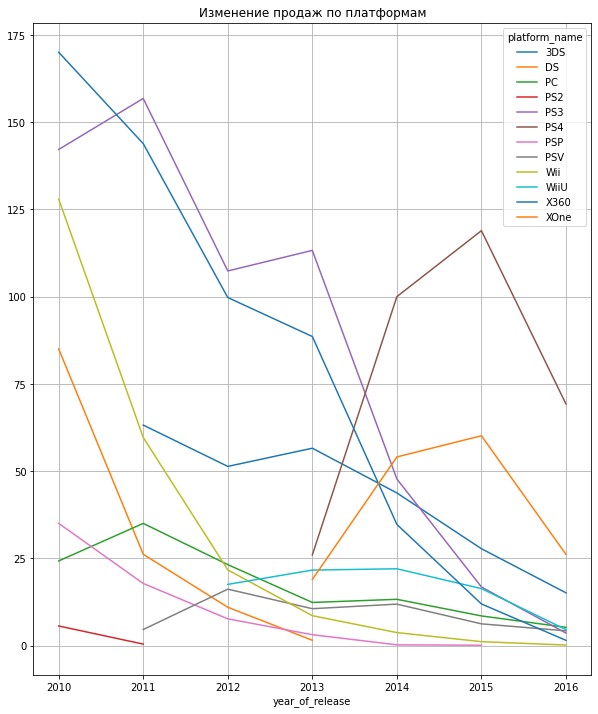

In [28]:
# создание сводной таблице по годам и сумарным продажам
# отрисовка графика по сводной таблице
(
    work_data
    .pivot_table(index='year_of_release',
                 columns='platform_name',
                 values='total_sales',
                 aggfunc='sum') 
    .plot(title='Изменение продаж по платформам',
          figsize=(10, 12), grid=True)
)    

На данный момент отсутствует явно растущие площадки, на части площадках продажи уже прекратились, однако остаются площадки, которые приносят прибыль. 

Сохраним результаты в `top_profit_platforms`.

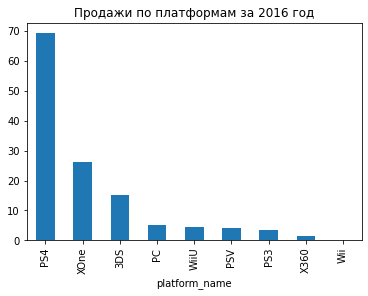

In [29]:
# выявление прибыльных площадок на 2016 год - последний год наблюдений
top_profit_platforms = (
    work_data
    .query('year_of_release == 2016 and total_sales > 0')
    .groupby('platform_name')['total_sales']
    .sum()
    .sort_values(ascending=False)
 )

top_profit_platforms.plot(kind='bar', title='Продажи по платформам за 2016 год')

Разница по прибыльности между первой платформой "PS4" и четвётрой платформы "PC" более 10 раз, поэтому для сопостовимости для анализа следует использовать первые три платформы: "PS4", "XOne" и "3DS"

**Вывод**

Наиболее прибыльные площадки - "PS4", "XOne" и "3DS", которые и следует использовать для анализа.

## 4.6 Постоение диаграммы размаха

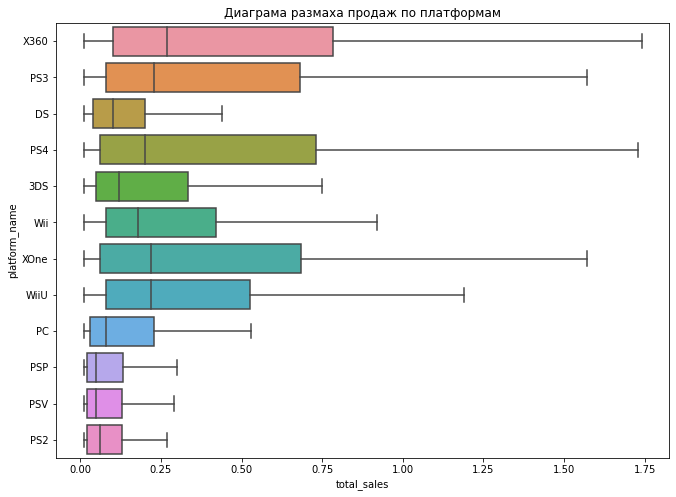

In [30]:
ax = sns.boxplot(x='total_sales', y='platform_name', 
            data=work_data,
            showfliers=False
           )

ax.set_title('Диаграма размаха продаж по платформам')
ax.figure.set_size_inches(11, 8)

**Выводы**

* Левые "усы" которкие, правые "усы" длинные, что означает:
    * игровая индустрия как конвеер постоянно создаёт игры;
    * большинство создаваемых игр имеет назначительные объемы продаж;
    * редкие игры срывают огромные продажи;
    * Есть платформы которые специализируются на недорогих играх.
* Средние по продажам находятся примерно в одном диапазоне, что означает:
    * массово создавать средние игры со средними продажами умеет большинство платформ;
    * создавать хиты с продажами в десятки и сотни раз выше средних продаж умеют единицы;
    * успешность платформы определяется умением генерировать хиты.

## 4.7 Влияние отзвов на продажи

Определим как влияют оценки игроков и критиков на продажи в самой популярной платформе.

In [31]:
# определим позицию платформы для аналица
# и выведем имя платформы по её индексу
top_profit_platform_position = 1  
top_profit_platform_name = top_profit_platforms.index[top_profit_platform_position - 1]
print('Платформа для анализа', top_profit_platform_name)

Платформа для анализа PS4


Для наглядности анализа построим диаграммы рассеяния.

При построении графика воспользуймся ранее найденным оптимальным органичением выбросов данных.

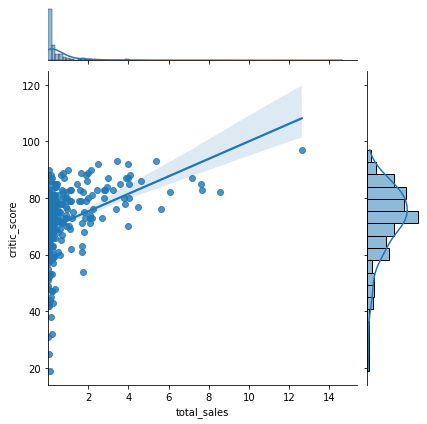

In [32]:
query = 'platform_name == @top_profit_platform_name' 
graph_data = work_data.query(query)
sns.jointplot(x='total_sales', y='critic_score', data=graph_data, kind='reg')

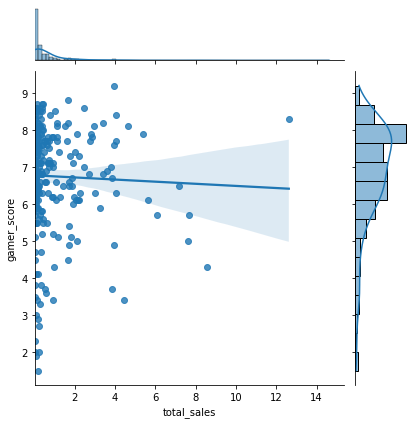

In [33]:
query = 'platform_name == @top_profit_platform_name'
graph_data = work_data.query(query)
sns.jointplot(x='total_sales', y='gamer_score', data=graph_data, kind='reg')

Распределение значений оценок критиков имеет восходящую форму, у игроков более рассеянное.

Графики визуально показывают, что в оценках критиков может иметься зависимость, а в оценках пользователей зависимость скорее отсутствует.

Посчитаем корреляцию по проверки предположений.

In [34]:


scores_sales_correlation = (
      work_data.query('platform_name == @top_profit_platform_name')  # отбор данных по имени платформы
      .corr()  # определение корреляции
      )

critic_corr = round(scores_sales_correlation['critic_score']['total_sales'], 2)
gamer_corr = round(scores_sales_correlation['gamer_score']['total_sales'], 2)

print('Корреляция продаж и оценок критиков', 
      '{:.2f}'.format(critic_corr))

print('Корреляция продаж и оценок игроков', 
      '{:.2f}'.format(gamer_corr))

Корреляция продаж и оценок критиков 0.41
Корреляция продаж и оценок игроков -0.03


На самой прибыльной платформе имеется **слабая зависимость оценок критиков и продаж**.

Игра с высокими продажами не обязательно получит высокую оценку критиков.

Игра с низкими продажами не обязательно получит низкукую оценку критиков.


**Отсутствует зависимость оценок игроков и продаж.**

Вкусы игроков индивидуальны, каждый игрок оценивает игру по своему вкусу, вне зависимости от общей популярности игры.

Для сравнение рассмотрим общую корреляцию остальным платформам.

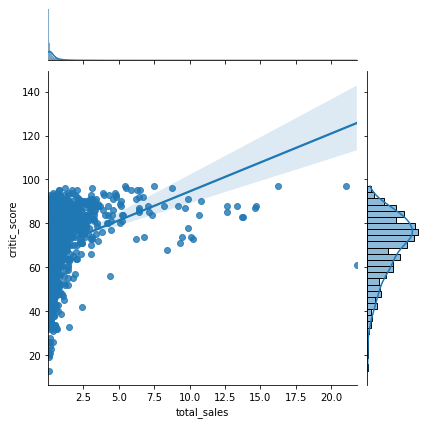

In [35]:
query = 'platform_name != @top_profit_platform_name'
graph_data = work_data.query(query)
sns.jointplot(x='total_sales', y='critic_score', data=graph_data, kind='reg')

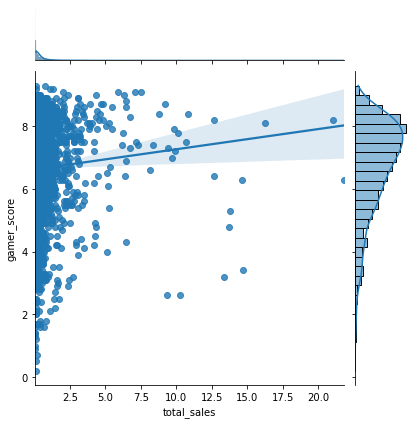

In [36]:
query = 'platform_name != @top_profit_platform_name'
graph_data = work_data.query(query)
sns.jointplot(x='total_sales', y='gamer_score', data=graph_data, kind='reg')

Характер графиков значительно не изменился, однако в оценках критиков добавилось рассеянности, следует ожидать снижение зависимости оценок критиков и продаж. Но не стоит ожидать изменения зависимости в оценках игроков.

In [37]:
scores_sales_correlation = (
      work_data.query('platform_name != @top_profit_platform_name')  # отбор данных по имени платформы
      .corr()  # определение корреляции
      )

print('Корреляция продаж и оценок критиков', 
      '{:.2f}'.format(scores_sales_correlation['critic_score']['total_sales']))

print('Корреляция продаж и оценок игроков', 
      '{:.2f}'.format(scores_sales_correlation['gamer_score']['total_sales']))

Корреляция продаж и оценок критиков 0.31
Корреляция продаж и оценок игроков 0.06


Ожидания подтвердились, зависимость оценок критиков и продаж очень слабая, а зависиость в оценке игроков и продаж существенно не изменились.

**Вывод**

На площадке с наибольшими продажами имеется слабая зависимость оценок критиков и продаж. 

Продажи никак не зависят от оценок игроков на любых платформах, однако, на площадке с наибольшими продажами зависимость оценок критиков и продаж более выражена.

Причины могут быть следующие:
* Критики оценивают уже выпущенный продукт и уже имеют первые данные об успешности игры и оценивают, что уже есть, а не что может быть, поэтому есть соответствие между оценками критиками и продажами. 
* Работа критика подразумевает комплексную всестороннюю оценку реальности, а не только оценку собственных индивидуальных ощущений.
* Игроки оценивают игры по своим индивидуальным ощущениям, без всесторонней оценки, сколько игроков, столько мнений, поэтому взаимосвязь с продажами не наблюдается.

## 4.8 Распределение по жанрам

Узнаем сумму продаж по отдельным жанрам.

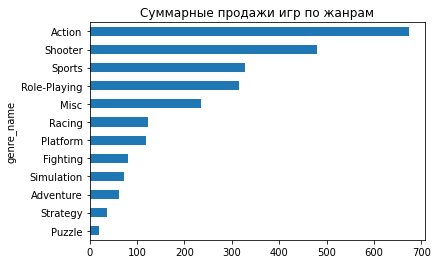

In [38]:
(
    work_data
    .groupby('genre_name')['total_sales']  # сортировка продаж по жанру
    .sum()  # суммирование общих продаж
    .sort_values(ascending=True)  # сортировка по убыванию
    .plot(kind='barh', title='Суммарные продажи игр по жанрам')
)

**Вывод**

Самые прибыльные жанры: Action, Shooter, Sports.

Самые низкие продажи в жанрах: Adventure, Puzzle, Strategy.

Игры, которые наполнены постоянной активностью пользуются большим спросом, чем игры, где требуется вдумчивые размышления.

<a name="5"></a>
# Этап 5. Составление портрета игроков каждого региона

## 5.1 Самые популярные платформы

### Регион Северная Америка

Определим самые популярные платформы в Северной Америке.

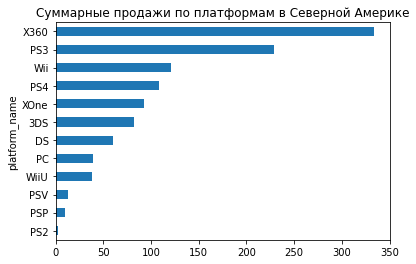

In [39]:


region_name = 'na_sales'
na_sales = (
    work_data
    .groupby('platform_name')[region_name]
    .sum()
    .sort_values(ascending=True)    
)

na_sales.plot(kind='barh', 
              title='Суммарные продажи по платформам в Северной Америке')

### Регион Европа

Определим самые популярные платформы в Европе.

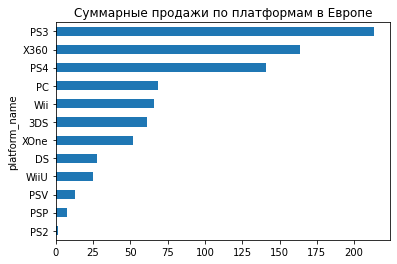

In [40]:


region_name = 'eu_sales'

eu_sales = (
    work_data
    .groupby('platform_name')[region_name]
    .sum()
    .sort_values(ascending=True)    
)

eu_sales.plot(kind='barh', 
              title='Суммарные продажи по платформам в Европе')

### Регион Япония

Определим самые популярные платформы в Японии.

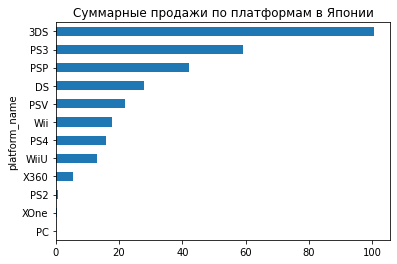

In [41]:


region_name = 'jp_sales'
jp_sales = (
    work_data
    .groupby('platform_name')[region_name]
    .sum()
    .sort_values(ascending=True)    
)

jp_sales.plot(kind='barh', 
              title='Суммарные продажи по платформам в Японии')

**<center>Сводка популярных платформ по продажам</center>**

 Позиция | Северная Америка | Европа | Япония
-:|:-:|:-:|:-:
1 | X360 | PS3 | DS
2 | PS2 | PS2 | PS2
3 | Wii | X360 | 3DS
4 | PS3 | Wii | PS3
5 | DS | DS | PSP



Построим графики соотношения продаж по платформам в разных регионах.

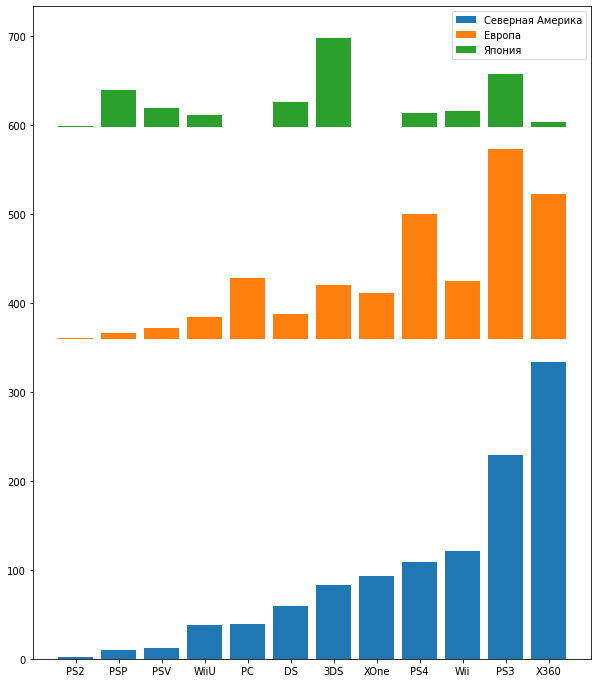

In [42]:
# определение данных для оси Х
x1 = na_sales.index
x2 = eu_sales.index
x3 = jp_sales.index

# определение данных для оси У
y1 = na_sales.values
y2 = eu_sales.values
y3 = jp_sales.values


fig, ax = plt.subplots()  # создание графических объектов

fig.set_figwidth(10)  # ширина графика
fig.set_figheight(12)  # высота графика

# создание линий графиков
ax.bar(x1, y1, label='Северная Америка') 
ax.bar(x2, y2, label='Европа', bottom = y1.max()+25)
ax.bar(x3, y3, label='Япония', bottom = y1.max()+y2.max()+25*2)

ax.legend(loc="upper right")

plt.show()  # отрифовка графика

**Выводы**

На рынке Северной Америки лидирует отечественная компания.

На рынке Японии в пятёрке лидеров только отечественные компании. 

В Европе лидерство удалось занять японской платформе, можно сделать предположение, что если бы существовала крупная европейская игровая платформа, то у неё были шансы занять лидерство на отечественном рынке.

В целом видно доминирование японских игровых платформ.

Следует отметить, что для Японии отсутствуют данные для персональных компьютеров, платформа имеет всемирное распространнеие, поэтому вероятность пропуска данных больше, чем нулевые продажи.

## 5.2 Самые популярные жанры

### Регион Северная Америка

Определим самые популярные жанры региона Северная Америка

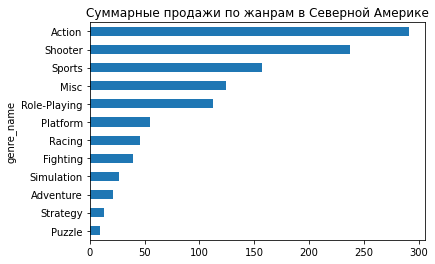

In [43]:
region_name = 'na_sales'

genre_na = (
    work_data
    .groupby('genre_name')[region_name]
    .sum()
    .sort_values(ascending=True)
)

genre_na.plot(kind='barh', 
              title='Суммарные продажи по жанрам в Северной Америке')

### Регион Европа

Определим самые популярные жанры региона Европа

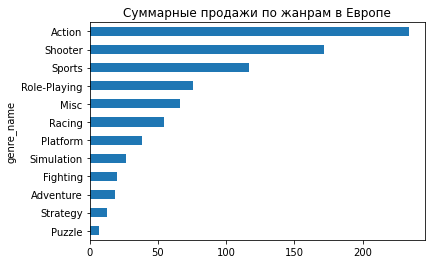

In [44]:
region_name = 'eu_sales'
genre_eu = (
    work_data
    .groupby('genre_name')['eu_sales']
    .sum()
    .sort_values(ascending=True)
)

genre_eu.plot(kind='barh', 
              title='Суммарные продажи по жанрам в Европе')

### Регион Япония

Определим самые популярные жанры региона Япония

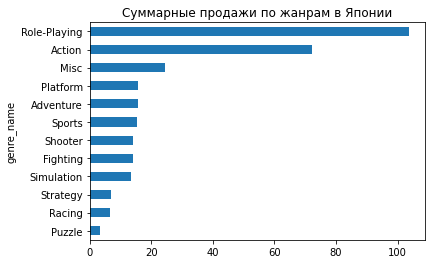

In [45]:
region_name = 'jp_sales'

genre_jp = (
    work_data
    .groupby('genre_name')[region_name]
    .sum()
    .sort_values(ascending=True)
)

genre_jp.plot(kind='barh', 
              title='Суммарные продажи по жанрам в Японии')

**<center>Сводка популярных платформ по продажам</center>**

 Позиция | Северная Америка | Европа | Япония
-:|:-:|:-:|:-:
1 | Action | Action | Role-Playing
2 | Sports | Shooter | Action
3 | Shooter | Shooter | Misc
4 | Misc | Misc | Sports
5 | Role-Playing | Racing | Platform


Построим графики соотношения продаж по жанрам в разных регионах.

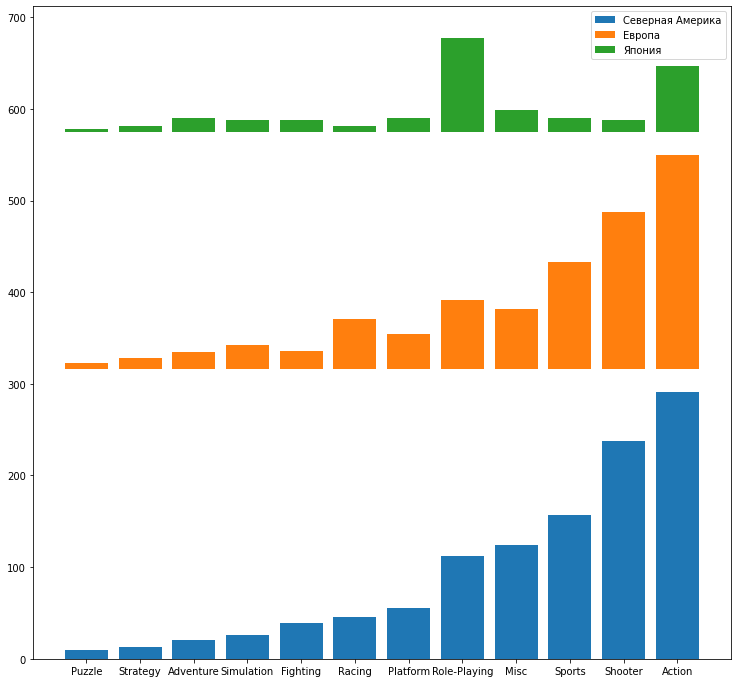

In [46]:
# определение данных для оси Х
x1 = genre_na.index
x2 = genre_eu.index
x3 = genre_jp.index

# определение данных для оси Y
y1 = genre_na.values
y2 = genre_eu.values
y3 = genre_jp.values

fig, ax = plt.subplots()  # создание графических объектов

fig.set_figwidth(12.5)  # ширина графика
fig.set_figheight(12)  # высота графика

# создание линий графиков
ax.bar(x1, y1, label='Северная Америка') 
ax.bar(x2, y2, label='Европа', bottom = y1.max()+25)
ax.bar(x3, y3, label='Япония', bottom = y1.max()+y2.max()+25*2)

ax.legend(loc="upper right")

plt.show()  # отрифовка графика

Как видно на графиках, предпочтения во вкусах в Северной Америке и Европе очень близки.

Во Вкусах Японии имеется перевес в жанрах `Role-Playing` и `Action`, остальные жары примерно одинаковы по продажам, в Европе и Америке распределение продаж в жанрах имеют плавное снижение.

Можно предположить, что в Японии производство и продвижение соспредоточено вокруг основных жанров, остальные жанры получают внимание по остаточному принципу.

**Выводы**

Вкусы Северной Америки и Европы практически одинаковые и по видам и по продажам, разница в препочтении ролевых и гоночных игр.

Вкусы Японии по видам жанров в большинстве совпадают, но полностью различаются по продажам, например стрелялки даже не вошли в пятёрку предпочтений, вместо этого японцы предпочитают платформеры.

В целом вкусы Северной Америки и Европы схожи, а с Японией координально различны.

Северная Америка и Европа близки по языкам, менталитетам, привычкам и вкусам.

Япония другая самобыстная цивилизация со своими вкусами и привычками, со своей индустрией производства игр. 

В Евпропе отсутсвует собственная масштабная игровая индустрия, в итоге Европой потребляется, то что создаётся в Северной Америке.

## 5.3 Влияние рейтинга ESRB на продажи

Рейтинг обозначается буквами, аналитические системы настроены на работу с числами, поэтому предварительно необходимо буквенные обозначения рейтинга перевести в числовые коды.

In [47]:
# определение числовых кодов рейтинга в отдельном столбце
work_data['esrb_rating_codes'] = (
    work_data['esrb_rating']  # выбор столбца с рейтингами
    .astype('category')  # выделение категорий
    .cat  # получение доступа к категорием
    .codes  # присвоение кодов для категорий
)
work_data.head()  # вывод результатов обработки

,game_name,platform_name,year_of_release,genre_name,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,gamer_score,esrb_rating,esrb_rating_codes
0,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,21.82,61.0,6.3,E,0
1,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,21.05,97.0,8.2,M,3
2,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,16.27,97.0,8.1,M,3
3,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,5.51,3.17,5.65,0.80,15.13,NaN,NaN,unknown,6
4,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,14.73,88.0,3.4,M,3


Теперь можно проанализировть связь рейтинга с продажами.

In [48]:
correlation = work_data['total_sales'].corr(work_data['esrb_rating_codes'])
print('Кореляция рейтинга и продаж:', '{:.2f}'.format(correlation))

Кореляция рейтинга и продаж: -0.13


Кореляция рейтинга и продаж незначительная, однако следует обратить внимание на отрицательную величину показателя. Что можно объяснить, что рейтинг всё же влияет на сдерживание продаж, в чём отчасти и заключается назначение рейтинга, например, ограничивать продажи по возрасту.

Получим продажи по рейтингам в различных регионах

### Регион Северная Америка

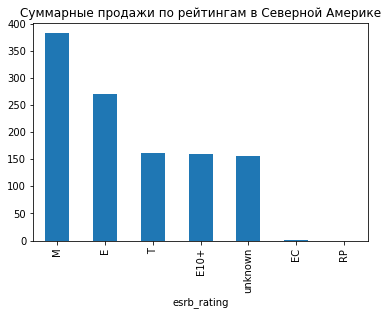

In [49]:
rating_sales_na = (
    work_data
    .groupby('esrb_rating')['na_sales']
    .sum()
    .sort_values(ascending=False)
)

rating_sales_na.plot(kind='bar',
                     title='Суммарные продажи по рейтингам в Северной Америке')

### Регион Европа

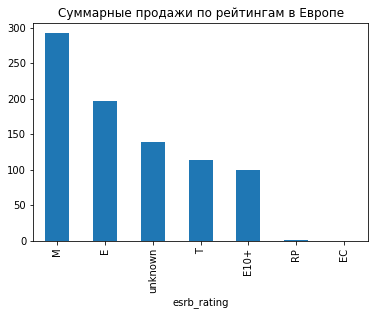

In [50]:
rating_sales_eu = (
    work_data
    .groupby('esrb_rating')['eu_sales']
    .sum()
    .sort_values(ascending=False)
)

rating_sales_eu.plot(kind='bar',
                     title='Суммарные продажи по рейтингам в Европе')

### Регион Япония

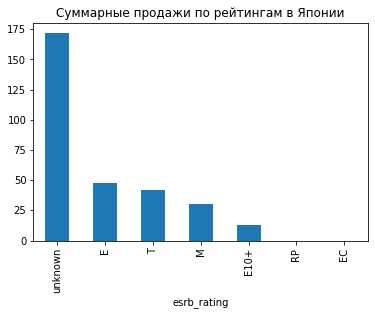

In [51]:
rating_sales_jp = (
    work_data
    .groupby('esrb_rating')['jp_sales']
    .sum()
    .sort_values(ascending=False)
)

rating_sales_jp.plot(kind='bar',
                     title='Суммарные продажи по рейтингам в Японии')

Построим графики для всех регионов

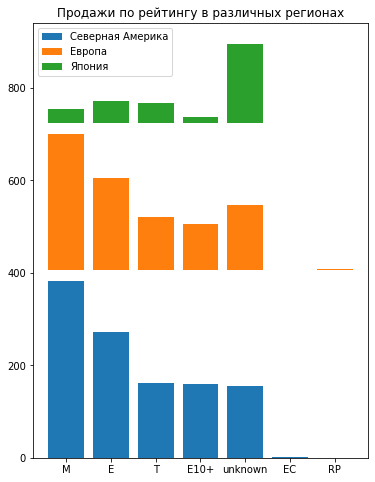

In [52]:
x1 = rating_sales_na.index
x2 = rating_sales_eu.index
x3 = rating_sales_jp.index

y1 = rating_sales_na.values
y2 = rating_sales_eu.values
y3 = rating_sales_jp.values

fig, ax = plt.subplots()

fig.set_figheight(8)

ax.set_title('Продажи по рейтингу в различных регионах')

ax.bar(x1, y1, label='Северная Америка')
ax.bar(x2, y2, bottom = y1.max()+25, label='Европа')
ax.bar(x3, y3, bottom = y1.max()+y2.max()+25*2, label='Япония')

ax.legend()
plt.show()

Пояснение к существующим рейтингам:
* «EC» («Early childhood») — «Для детей младшего возраста»
* «E» («Everyone») — «Для всех»
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «T» («Teen») — «Подросткам»
* «M» («Mature») — «Для взрослых»
* «RP» («Rating Pending») — «Рейтинг ожидается»
* «AO» («Adults Only 18+») — «Только для взрослых»

Как видно бóльшая часть продаж игр в Японии относится к неизвестному рейтингу, что может означать что в Японии своя система оценки игр, а именно система [CERO](https://ru.wikipedia.org/wiki/Computer_Entertainment_Rating_Organization), поэтому для подробного анализа японских игр необходима дополнительная информация.

Что можно отметить в полученных данных:
* В США и Европе единая система оценок игр;
* Соотношения рейтингов и продаж в США и Европе практически одинаковы;
* По части доступных данных в Японии другая структура продаж по рейтингу;
* Самый популярный рейтинг: «M» — «Для взрослых»;
* Второй по популярности рейтинг: «E» — «Для всех»
* Остальные рейтинги с заметными продажами: «T» — «Подросткам» и «E10+» «Для всех от 10 лет и старше»;
* Продажи игр для малышей (рейтинг «EC») около нуля;
* «Рейтинг ожидается» («RP») временный рейтинг до выпуска игры, поэтому продажи должны быть на нулевом уровне.


**Выводы**

Рейтинг не влияет напрямую на продажи, рейтинг скорее перераспределяет продажи по категорием и незначительно сдерживает продажи, например, при ограничении по возрасту

Из распределения продаж по рейтингу можно сделать предположение, что продажи по рейтингу завясят от платежеспособности покупателей, чем от возрастного интереса к играм и возможности тратить время на игры.

Игры для взрослых продаются лучше всего, поскольку у взрослых наибольшие финансовые возможности покупать игры, а у подстростков бюджет на игры ограничен, не смотря на возрастной интерес к играм.
Универсальные игры для всех продаются хуже игр для взрослых, поскольку эти игры для групп с разной платежеспособностью, в итоге универсальность в рейтинге не даёт приемуществ в продажах.

<a name="6"></a>
# Этап 6. Исследование статистических показателей

## 6.1 Расчёт среднего, дисперсии, отклонения

Для дальнейшего анализа будем использовать средние значения, дисперсию и среднеквадратичные отклонения. 

Сначала посчитаем, потом визуализируем и сделаем выводы.

In [53]:
rating_stats = (
    work_data
    .groupby('genre_name')[['critic_score', 'gamer_score']]  # отбор жанров и оценок
    .agg(['mean', 'var', 'std'])  # расчёт показателей
    )
rating_stats

critic_score              ... gamer_score          
                     mean         var  ...         var       std
genre_name                             ...                      
Action          68.889045  181.991891  ...    1.850148  1.360201
Adventure       70.242424  161.042672  ...    1.727313  1.314273
Fighting        70.073171  187.281487  ...    1.761921  1.327374
Misc            69.021429  163.373638  ...    2.249127  1.499709
Platform        74.432990  170.039734  ...    2.708364  1.645711
Puzzle          71.740741   77.430199  ...    1.211286  1.100584
Racing          70.739437  181.782689  ...    2.580482  1.606388
Role-Playing    73.062992  147.245028  ...    1.450481  1.204359
Shooter         71.881188  188.853387  ...    2.355861  1.534881
Simulation      64.670886  157.659526  ...    2.923804  1.709913
Sports          70.696970  241.991474  ...    2.835634  1.683934
Strategy        73.500000  151.859155  ...    2.913574  1.706919

[12 rows x 6 columns]

Полученные данные для наглядности следует далее представить в виде графиков.

## 6.2 Построение графиков

Построим диаграммы размаха для оценок критиков и игроков.

Оценки критиков находятся в промежутке от 0 до 100, а у игроков от 0 до 10, чтобы графики были сопоставимы, вместо автомасштабирования зададим сторигие рамки по оси Х от 10 до 100 для оценок критиков и от 1 до 10 для оценок игроков.

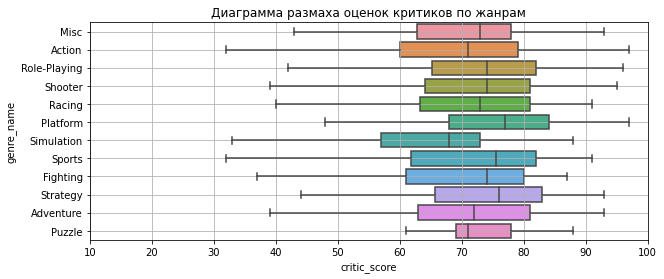

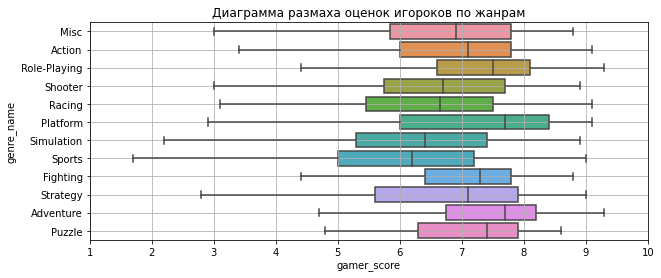

In [54]:
ax = sns.boxplot(x='critic_score', y='genre_name', 
            data=work_data,
            showfliers=False  # настройка отображения выбросов
           )

ax.set_title('Диаграмма размаха оценок критиков по жанрам')
ax.set_xlim(10, 100)  # установка сопостовимых масштабов
ax.figure.set_size_inches(10, 4)
ax.grid(True)
plt.show()

ax = sns.boxplot(x='gamer_score', y='genre_name', 
            data=work_data,
            showfliers=False  # настройка отображения выбросов
           )

ax.set_title('Диаграмма размаха оценок игороков по жанрам')
ax.set_xlim(1, 10)  # установка сопостовимых масштабов
ax.figure.set_size_inches(10, 4)
ax.grid(True)
plt.show()

У диаграмм размаха наблюдается скошенность влево, что для игр можно объяснить как:
* В рекламных целях игры приукрашивают, завышают ожидания, что оборачивается разочарованием и низкими оценками;
* Однако игры постепенно дорабатывают, выпускают дополнения и в итоге средняя оценка постепенно растёт.


**Выводы**

Согласно диаграммам размаха, можно сделать выводы:
* Критики редко ставят низкие оценки, часто отличные, близкие к высшему балу;
* Игроки часто ставят низкие оценки, редко отличные, близкие к низшему балу;
* Несмотря на противоположные подходы в выставлению оценок, распеределения оценок игроков и критиков уже расходятся незначительно, и часто сходятся, в среднем критики и игроки более единодушы в оценках.

<a name="7"></a>
# Этап 7. Проверка гипотез

## 7.1 Гипотеза: Средние рейтинги игроков для платформ Xbox One и PC одинаковые;

Для проверки гипотезы связи значений воспользуемся нулевой гипотезой.

Сформулируем нулевую гипотезу H<sub>0</sub> и альтернативную H<sub>1</sub>:

* H<sub>0</sub>: "Средние рейтинги игроков для платформ Xbox One и PC - **равны**"
* H<sub>1</sub>: "Средние рейтинги игроков для платформ Xbox One и PC - **не равны**"

Проверим нулевую гипотезу.

Перед началом проверки гипотез слудует выяснить насколько равны дисперсии совокупностей

In [55]:
critic_score_var = (
    work_data
    .groupby('genre_name')['critic_score']  # отбор жанров и оценок
    .agg(['var'])  # расчёт показателей
    )

gamer_score_var = (
    work_data
    .groupby('genre_name')['gamer_score']  # отбор жанров и оценок
    .agg(['var'])  # расчёт показателей
    )

a = [float(n) for n in critic_score_var.values]
b = [float(n) for n in gamer_score_var.values]

stat, p = st.levene(a, b)

alpha = 0.05

if p < alpha:
    print(f'P-значение равно {p:.2%}, что меньше уровня значимости {alpha:.0%}, значит дисперсии НЕ равны.')
else:
    print(f'P-значение равно {p:.2%}, что выше уровня значимости {alpha:.0%}, значит дисперсии равны.')    


P-значение равно 0.71%, что меньше уровня значимости 5%, значит дисперсии НЕ равны.


Небольшое значение р говорит о том, что совокупности не имеют равных дисперсий.

Следовательно при проверке гипотез необходимо использовать параметр неравенства дисперсий: `equal_var = False`

Функция проверки гипотез через T-критерий Стьюдента не работает с данными с пропусками, следует удалить пропуски, полученный набор данных назавём `work_data_dropna`

In [56]:
work_data_dropna = work_data.dropna()
print('Число пропусков в данных:')
work_data_dropna.isna().sum()

Число пропусков в данных:


game_name            0
platform_name        0
year_of_release      0
genre_name           0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
total_sales          0
critic_score         0
gamer_score          0
esrb_rating          0
esrb_rating_codes    0
dtype: int64

Пропуски удалены, можно проверять гипотезы

In [57]:
# определение образцов выборки
sample_1 = work_data_dropna[work_data_dropna['platform_name'] == 'XOne']['gamer_score']
sample_2 = work_data_dropna[work_data_dropna['platform_name'] == 'PC']['gamer_score']

alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(sample_1, sample_2, equal_var=False)  # сравнение выборок

p = results.pvalue 

if p < alpha:
    print(f'P-значение равно {p:.2%}, что меньше уровня значимости {alpha:.0%}')
    print('Отвергаем нулевую гипотезу')
else:
    print(f'P-значение равно {p:.2%}, что выше уровня значимости {alpha:.0%}')    
    print('Не получилось отвергнуть нулевую гипотезу')    


P-значение равно 91.27%, что выше уровня значимости 5%
Не получилось отвергнуть нулевую гипотезу


Значение статистической значимости около наивысшей границы, что говорит, что вереятность равенства средних оценок высока.

**Гипотеза:** "Средние рейтинги игроков для платформ Xbox One и PC одинаковые" **подтреждена**.

## 7.2 Гипотеза: Средние рейтинги игроков для жанров Action и Sports - разные

Для проверки гипотезы связи значений воспользуемся нулевой гипотезой.

Сформулируем нулевую гипотезу H<sub>0</sub> и альтернативную H<sub>1</sub>:

* H<sub>0</sub>: "Средние рейтинги игроков для жанров Action и Sports - **равны**"
* H<sub>1</sub>: "Средние рейтинги игроков для жанров Action и Sports - **не равны**"

Проверим нулевую гипотезу.

In [58]:
# определение образцов выборки
sample_1 = work_data_dropna[work_data_dropna['genre_name'] == 'Action']['gamer_score']
sample_2 = work_data_dropna[work_data_dropna['genre_name'] == 'Sports']['gamer_score']

alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(sample_1, sample_2, equal_var=False)  # сравнение выборок

p = results.pvalue 

if p < alpha:
    print(f'P-значение равно {p:.10%}, что меньше уровня значимости {alpha:.0%}')
    print('Отвергаем нулевую гипотезу')
else:
    print(f'P-значение равно {p:.2%}, что выше уровня значимости {alpha:.0%}')    
    print('Не получилось отвергнуть нулевую гипотезу')    

P-значение равно 0.0000000895%, что меньше уровня значимости 5%
Отвергаем нулевую гипотезу


Значение статистической значимости исчезающе мало, следовательно гипотеза о том, что средние рейтинги игроков равны - отвергнута. А значит подтверждается альтернативная гипотеза, о том что средние оценки по жанрав неравны.

**Гипотеза:** "Средние рейтинги игроков для жанров Action и Sports - разные" **подтреждена**.

<a name="8"></a>
# Этап 8. Общие выводы

**Задача для анализа**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки игроков и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Результаты исследования

### Ход исследования

1. **Обработка данных**
    
    Чтобы превести данные впорядок пришлось уточнить название столбцов, оставить пропуски, которые не мешали большинству исследований. Пропуски пришлось убирать только для проверки гипотез.
    
2. **Анализ данных**
    
    Анализ продаж по годам выявил что до 2008 года был бурный рост игровой индустрии, в 2008-2009 годах пик продаж, а с 2010 года началось падение продаж, именно последняя тенденция спада продаж была взята для анализа.
    
    Удалось выяснить, что средняя жизнь платформы около 7 лет, что примерно соответствут жизни белки, срок жизни может показаться коротким, однако популярные платформы за это время умудряются продать игры на сотни миллионов долларов США.
    
    В платформах доминирует "большая тройка" - "PS4", "XOne" и "3DS", Япония и США лидеры в производстве игр.
    
    По жанрам спрос игроков приходятся больше на активные игры, чем на интеллектуальные. 
    
    Оказалось, что несмотря на то что игроки являются конечными покупателями игр, тем неменее продажи не зависят от оценки игроков из-за индивидуальности вкусов игроков, а вот связь между продажами и оценками критиков имеется, хотя слабая, критики действительно стремятся предсказывать успешность игры.
    
3. **Составление портрета игроков**    

    Сравнительный анализ продаж и жанров по регионам дал понимание, что вкусы Америки и Европы очень близки, а с Японией непохожи. В Японии и США лидируют отечественные платформы по производству игр, а в Европе нет собственного крупного отечественного производителя игр. Несмотря на различие вкусов, Японии удалось отвоевать у США лидерство на европейском рынке.
    
    Анализ влияния рейтинга на продажи подтвердил назначение рейтинга, сдерживания продаж игр, с ограничениями для пользователей, однако такая связь крайне слабая. А в целом рейтинг не влияет на продажи.
    
   Однако можно рейтинг показывает где сосредоточен наиболее платёжеспособный спрос, что полезно для максимизации продаж.
     
    
4. **Статистический анализ**

    Статистический анализ показал, что хотя разброс в оценках критиков и игроков разный, а вот средние показатели достаточно близки, в среднем критики и игроки очень близки в своём мнение, а вот по отдельности игроки ставят больше низких оценок, а критики больше хороших.
    
    Так же проверка статистических гипотез показала, что в разных жанрах, на разных платформах средние оценки могут быть схожи по своему характеру. Что можно объяснить, что одни и теже игры выходят на разных платформах, одни и теже игроки играют в разные жанры.
    
**Исследование дало множество информации для возможности улучшить стратегию продаж на следующий год**    
    

### Стратегия продаж


#### Ставка на мнения участников
* **Мнение критиков** слабо взаимосвязанно с продажами, одноко за мнениями критиков полезно следить и использовать для анализа;
* **Мнение игроков** с продажами взаимосвязано на уровне статистической погрешности, на мнение игроков не стоит делать ставку;
* У разных регионов разные вкусы, для понимания и подстройки продаж под вкусы регионов помогут мнения критиков

#### Ставка на платформы
* Стационарные платформы находятся в тенденции падании продаж, а продажи на мобильных платформах растут, следует концентрироваться на мобыльных платформах;
* Следует делать ставку на продажи на наиболее прибыльных платформах: `"PS4", "XOne" и "3DS"`;
* У платформ есть фаза роста и фаза падения, лучше делать ставки на растущие платформы;
* После 2-3 летнего спада продаж, следует задумываться о перераспределении рекламного бюджета на новые растущие платформы;
* Персональный компьютер стабильная платформа, без высокой прибыли и без высокого риска.
* Оценки на разных платформах и по разным жанрам могут быть одинаковыми, что означает:
    * игроки пользуются разными платформами и играют в игры разных жанров;
    * выгоднее продавать игры разных жанров для разных платформ, чем концентрировать на отдельных жанрах и платформах.



#### Ставка на жанры
* Продажи по жанрам могут различатся в десятки раз, следует делать ставку на активные игры;
* В разных регионах разные вкусы, в стратегии продаж нужно учитывать вкусы каждого региона;
* Выгодно расширять набор жанров одни и теже игроки играют в разные игры на разных платформах, нет смысла концетрации на отдельных жанрах и платформах.



#### Ставка на рейтинг

* Рейтинг не влияет на продажи, но показывет как распределён платежеспособный спрос;
* Игры для взрослых и зарабаютывающих людей дают наибольшие продажи, чем игры для наиболее активных игроков-подростков.

## Сводка стратегии продаж

* Переходить с падающего рынка стационарных платформ на мобильные платформы;
* Максимально расширять охват жанров и платформ;
* Быстро переключаться с умирающих платформ на растущие;
* Часть списка продаж формировать на основе оценок именитых критиков;
* Подстраивать продажи под региональные вкусы;
* Принимать мнения игроков для улучшения обслуживания, но игнорировать мнение игроков, о том какие игры продавать;
* Делать ставку на игры с рейтингом для платежеспособных взрослых, потом для всех, а далее уже для подростков и детей.